# Exploratory Data Analysis

The process of reviewing and cleaning data to...
- derive insights
- generate hypotheses

In [2]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data


In [3]:
data = pd.read_csv("Employee Attrition.csv")

 A first look with .head()

In [4]:
data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


Gathering more .info()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB


unique values for each column

In [6]:
data.nunique()

Emp ID                   14999
satisfaction_level          92
last_evaluation             65
number_project               6
average_montly_hours       215
time_spend_company           8
Work_accident                2
promotion_last_5years        2
dept                        10
salary                       3
dtype: int64

.describe() numerical columns

In [7]:
data.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


Addressing missing data

Why is missing data a problem?
___

- Affects distributions
- Missing heights of taller students

    - Less representative of the populationCertain groups disproportionately
    - represented, e.g., lacking data on oldest students
- Can result in drawing incorrect conclusions

In [8]:
data.isnull().sum()

Emp ID                   788
satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
Work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64

every column has a same total number of missing data

In [9]:
# Check
data[data.isnull().any(axis=1)]

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
12783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After observation : we have to drop all the row with missin value

In [10]:
data = data.dropna()

In [11]:
# sanity check
data.isnull().any()

Emp ID                   False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
dtype: bool

In [12]:
data.shape

(14999, 10)

## Handling outliers
___
Why look for outliers?
- Outliers are extreme values
    - may not accurately represent our data
- Can change the mean and standard deviation
- Statistical tests and machine learning models need normally distributed data

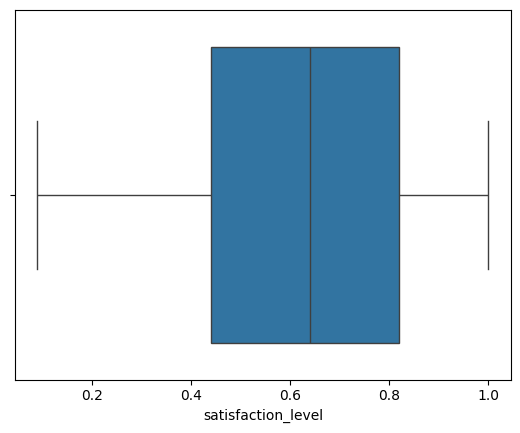

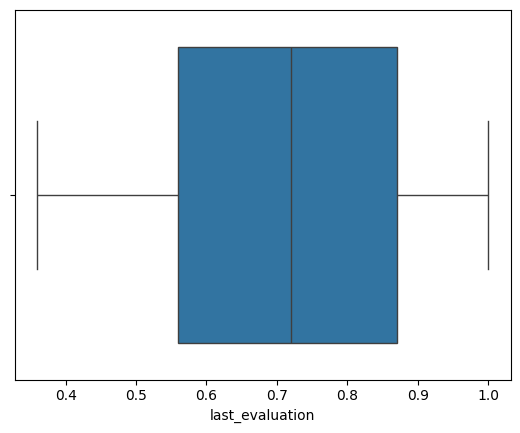

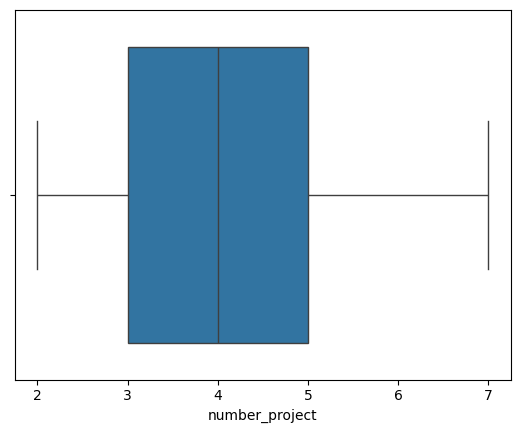

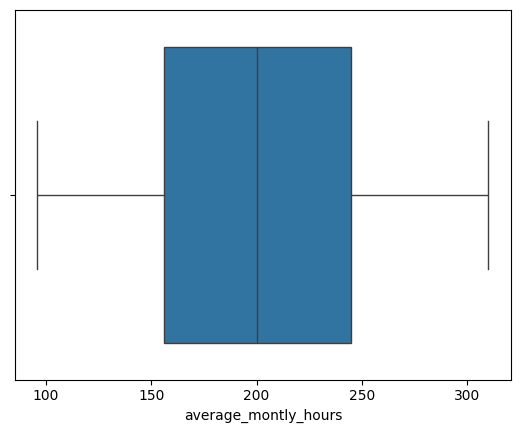

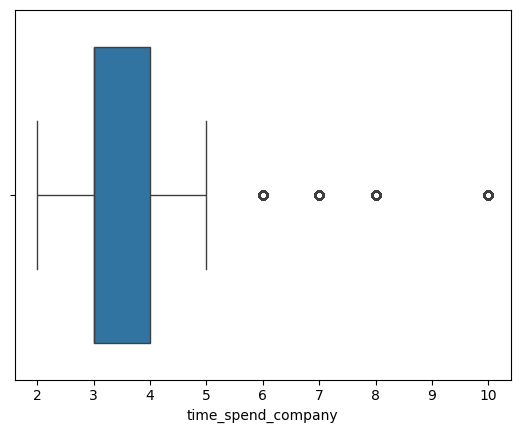

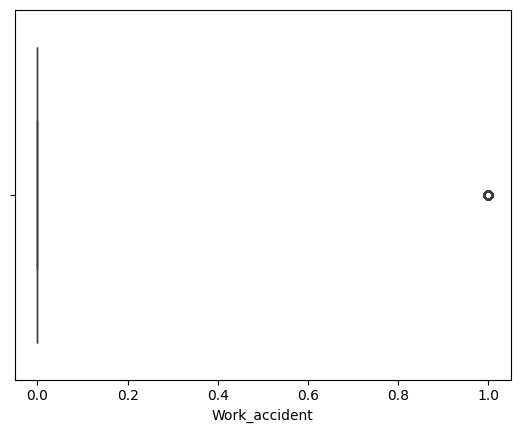

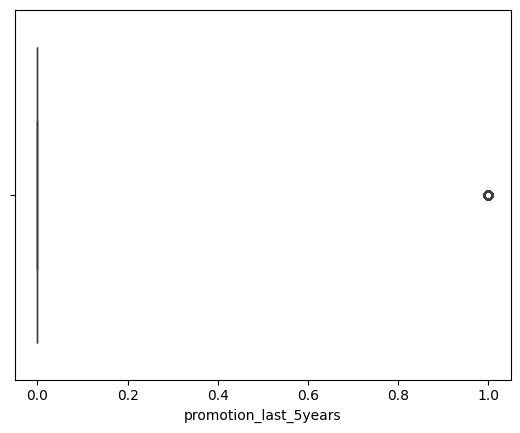

In [13]:
for n in data.select_dtypes('number').columns[1:]:
    sns.boxplot(data=data, x = n)
    plt.show()

In [14]:
# observe time spend company, work accident, promotion last year

In [15]:
# check time spend company

def check_outlier(data, var):
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[var] < lower_bound) | (data[var] > upper_bound)]
    return outliers

outlier_time_spend = check_outlier(data=data, var="time_spend_company")
outlier_time_spend

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
17,18.0,0.78,0.99,4.0,255.0,6.0,0.0,0.0,sales,low
34,35.0,0.84,0.87,4.0,246.0,6.0,0.0,0.0,hr,low
47,48.0,0.57,0.70,3.0,273.0,6.0,0.0,0.0,support,low
67,68.0,0.90,0.98,4.0,264.0,6.0,0.0,0.0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
15730,14943.0,0.20,0.50,5.0,135.0,6.0,0.0,0.0,RandD,low
15735,14948.0,0.91,0.98,4.0,242.0,6.0,0.0,0.0,support,low
15765,14978.0,0.81,0.85,4.0,251.0,6.0,0.0,0.0,hr,medium
15774,14987.0,0.85,0.85,4.0,247.0,6.0,0.0,0.0,technical,low


In [16]:
# check
outlier_time_spend.value_counts('time_spend_company')

time_spend_company
6.0     718
10.0    214
7.0     188
8.0     162
Name: count, dtype: int64

<Axes: xlabel='time_spend_company', ylabel='count'>

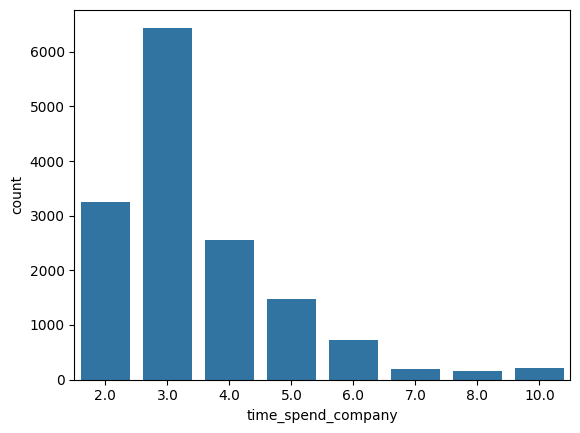

In [17]:
# histplot
sns.countplot(data=data, x = 'time_spend_company' )

Why do these outliers exist?
- More senior roles / different spend time in company more
- Consider leaving them in the dataset

accident very rare

In [18]:
data.value_counts('Work_accident')

Work_accident
0.0    12830
1.0     2169
Name: count, dtype: int64

<Axes: xlabel='Work_accident', ylabel='count'>

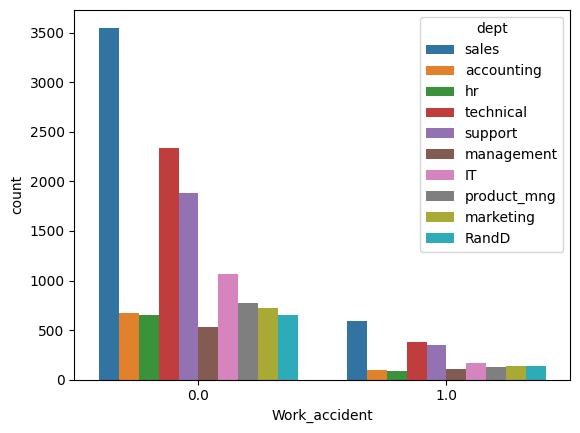

In [19]:
sns.countplot(data =data, x = 'Work_accident', hue='dept')

Sales do a lot of fieldwork ?

In [20]:
# promotion_last_5years
data['promotion_last_5years'].value_counts()

promotion_last_5years
0.0    14680
1.0      319
Name: count, dtype: int64

It's very normal to have a little employee that had promtion in last 5 yerars

In [21]:
data[data['promotion_last_5years'] == 1].value_counts('time_spend_company')

time_spend_company
3.0     134
2.0      54
7.0      36
4.0      35
5.0      17
6.0      17
10.0     16
8.0      10
Name: count, dtype: int64

## Explore every column and releationship

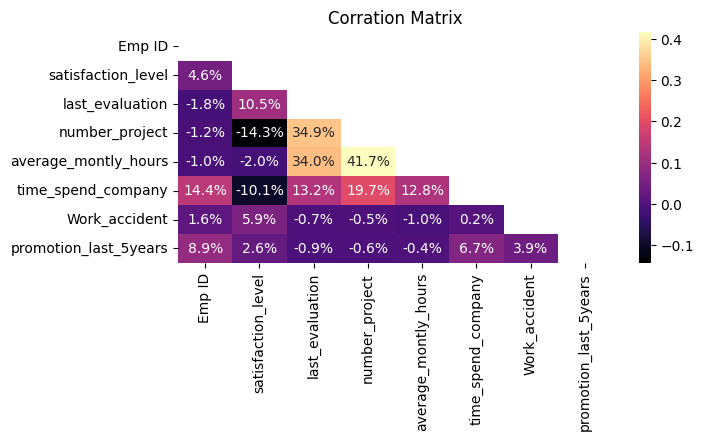

In [22]:


corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 3))
sns.heatmap(corr, annot=True, mask=mask, fmt=".1%", cmap="magma")
ax.grid(False)
ax.set_title("Corration Matrix")
plt.show()

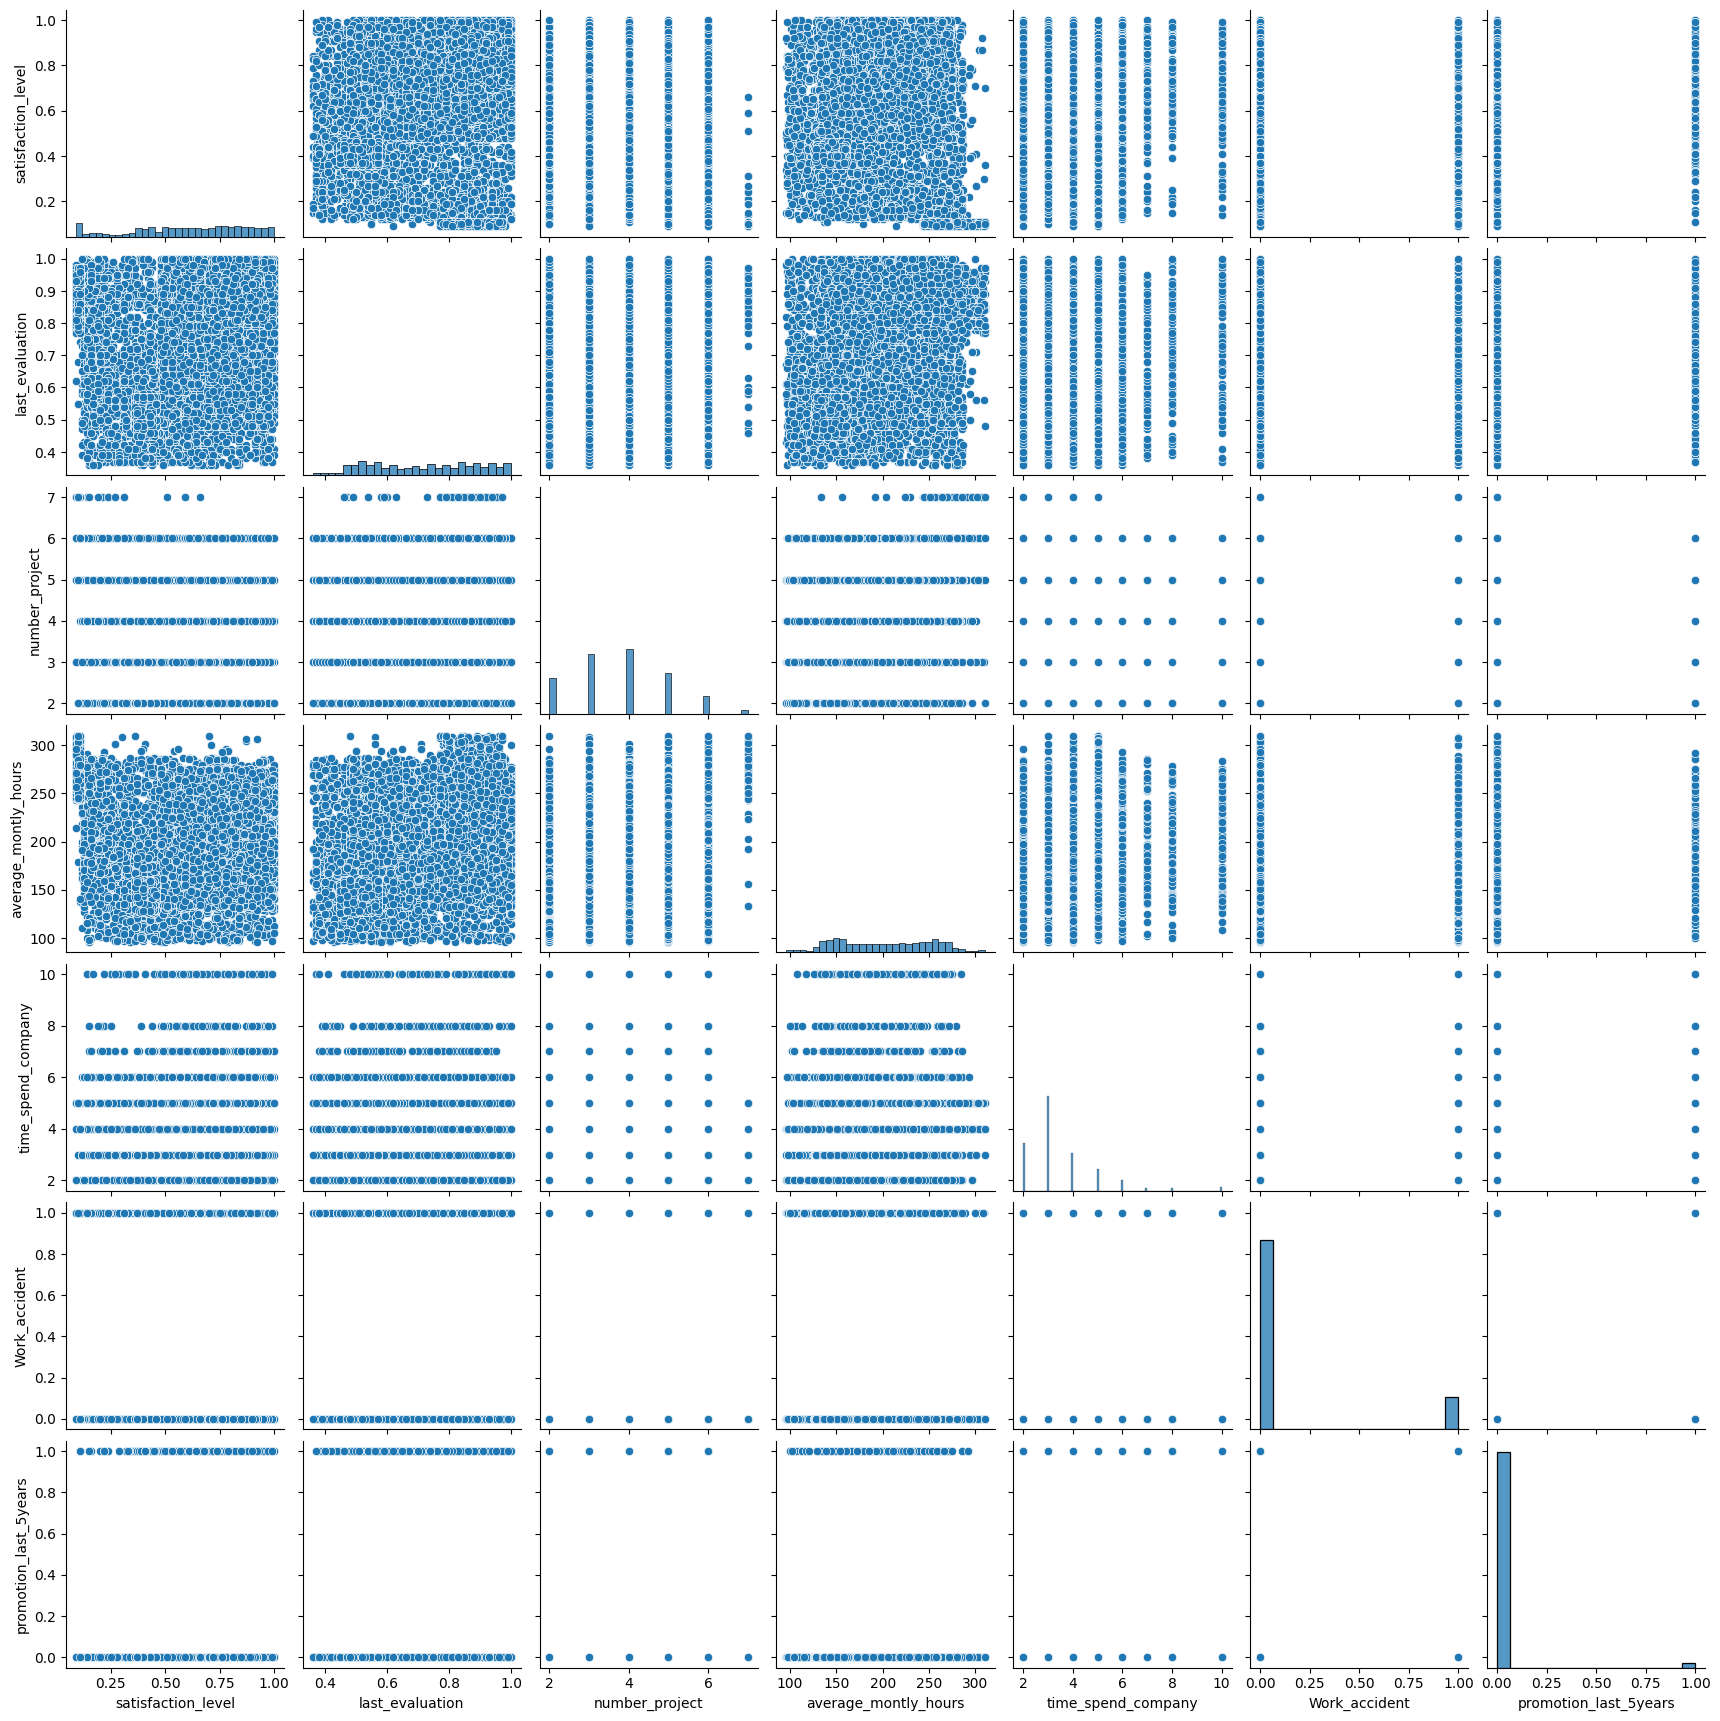

In [23]:
sns.pairplot(data=data.drop(columns=['Emp ID']))

Exploring categorical relationships

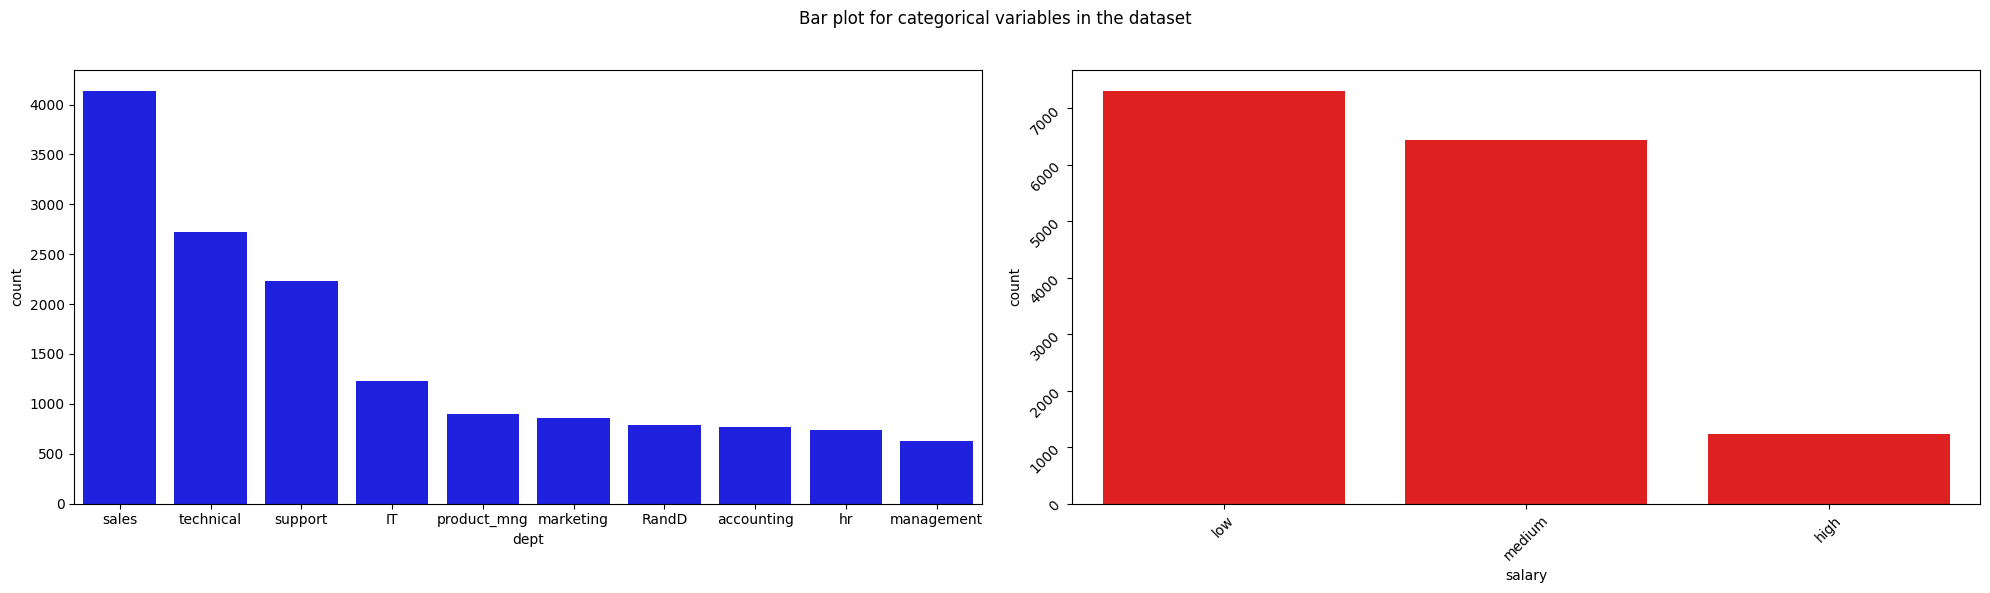

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust grid to 1x2
fig.suptitle('Bar plot for categorical variables in the dataset')

# Plot 1: 'dept' variable
sns.countplot(ax=axes[0], x='dept', data=data, color='blue',
              order=data['dept'].value_counts().index)

# Plot 2: 'salary' variable
sns.countplot(ax=axes[1], x='salary', data=data, color='red',
              order=data['salary'].value_counts().index)

# Adjust tick labels
axes[0].tick_params(labelrotation=0)  # No rotation for first plot
axes[1].tick_params(labelrotation=45)  # Rotate x labels by 45 degrees for second plot

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


C:\Users\farha\AppData\Local\Temp\ipykernel_23840\1163966024.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(x='dept', data=data, color='blue',


<Axes: xlabel='dept', ylabel='count'>

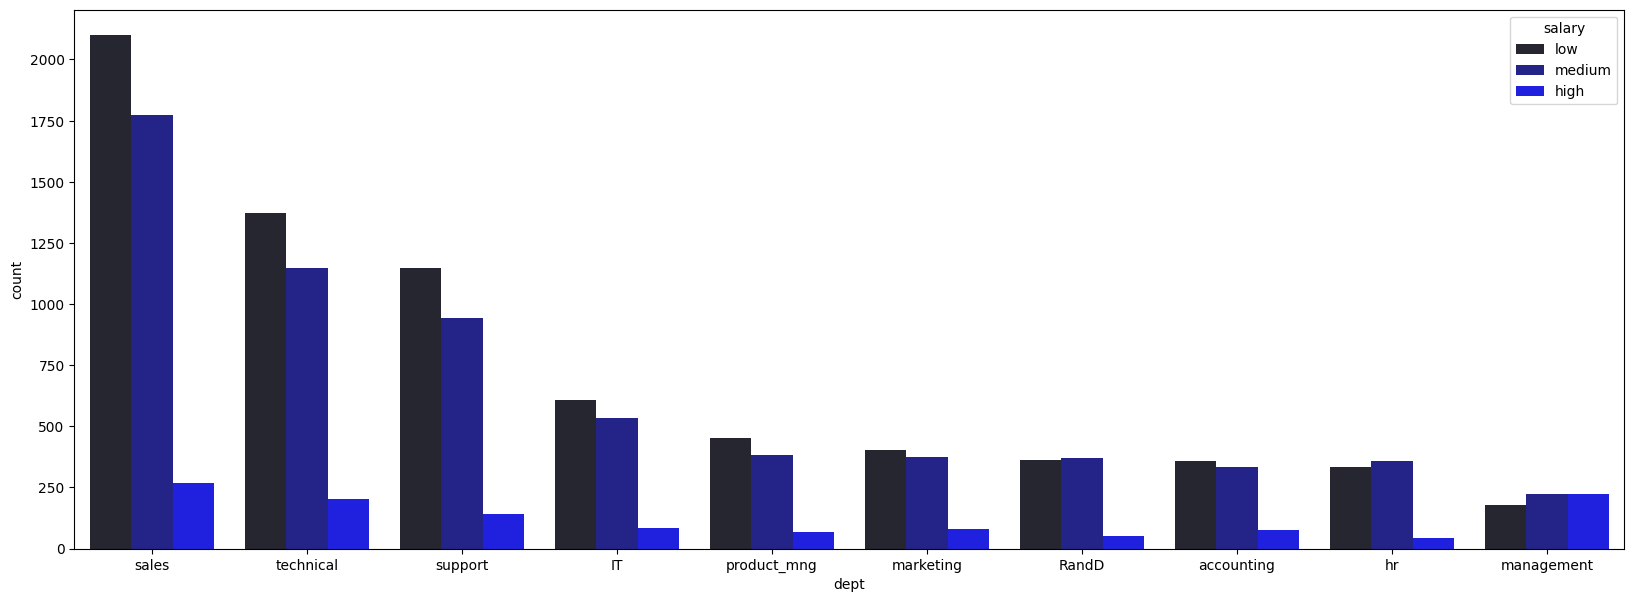

In [25]:
# Plot 1: 'dept' variable
plt.figure(figsize=(20,7))
sns.countplot(x='dept', data=data, color='blue',
              order=data['dept'].value_counts().index, hue='salary')

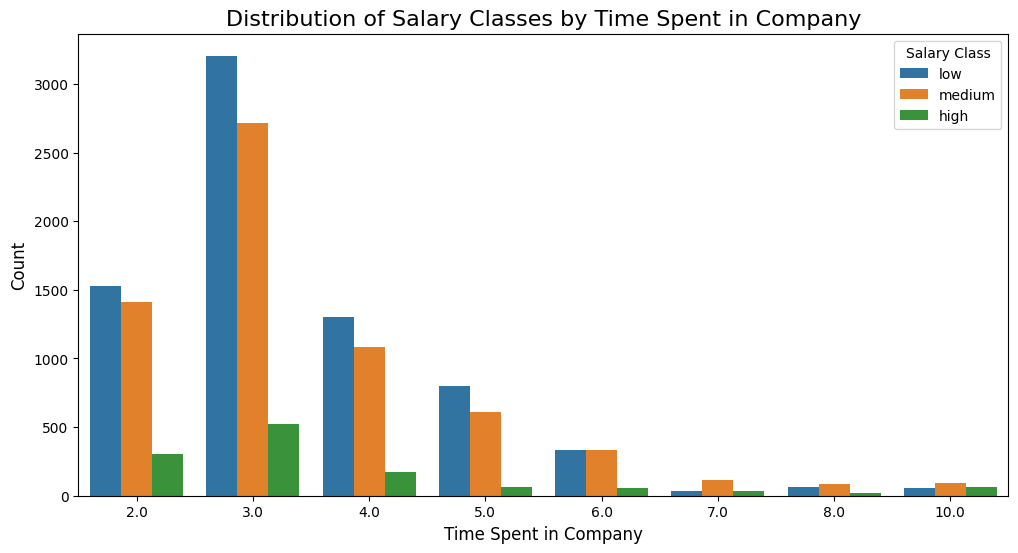

In [26]:
plt.figure(figsize=(12, 6))

# Creating the countplot
sns.countplot(data=data, x='time_spend_company', hue='salary')

# Adding labels and title
plt.title('Distribution of Salary Classes by Time Spent in Company', fontsize=16)
plt.xlabel('Time Spent in Company', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Salary Class')
plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.3+ MB


Emp ID
Skew : 0.0


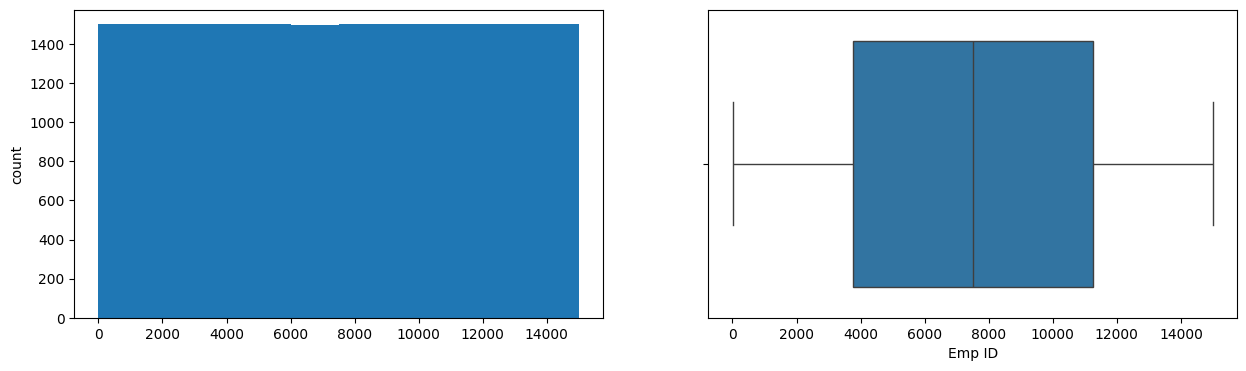

satisfaction_level
Skew : -0.48


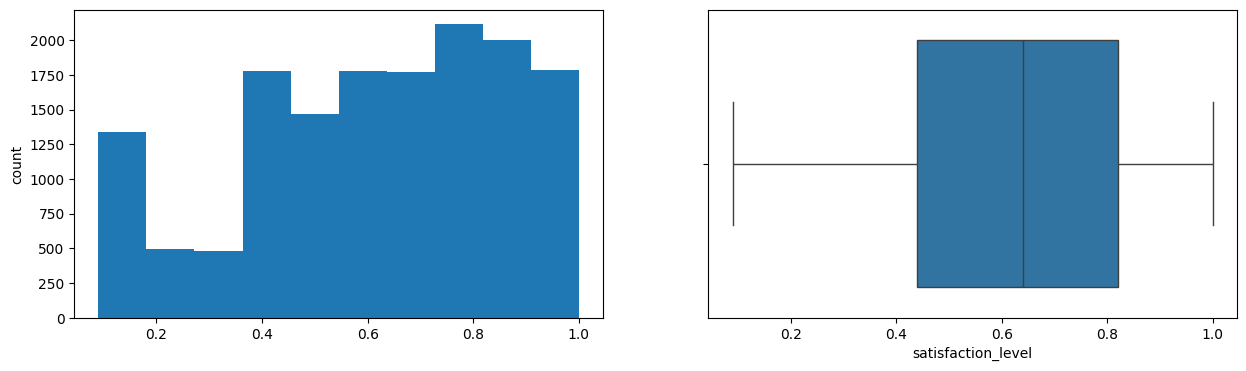

last_evaluation
Skew : -0.03


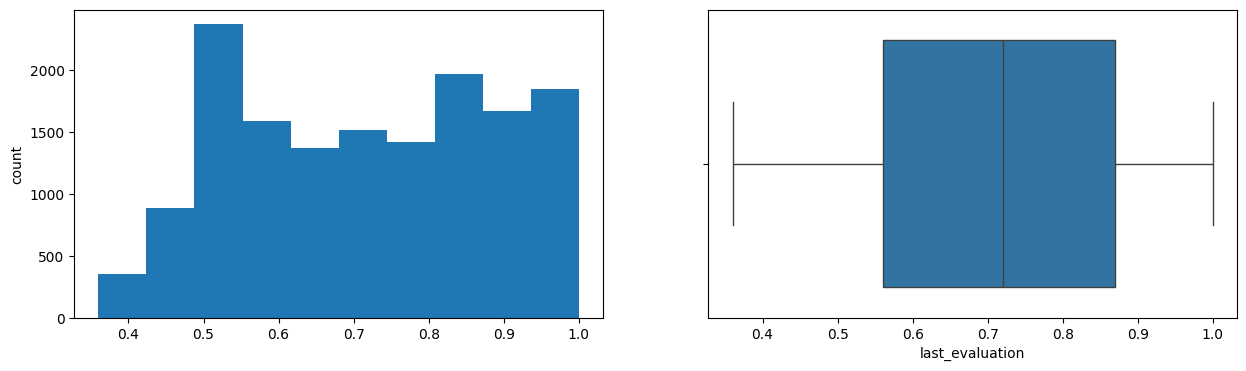

number_project
Skew : 0.34


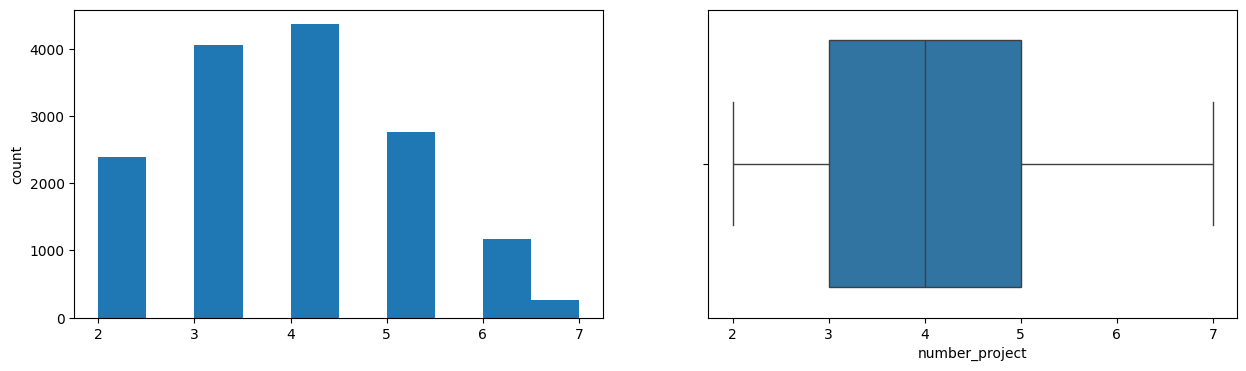

average_montly_hours
Skew : 0.05


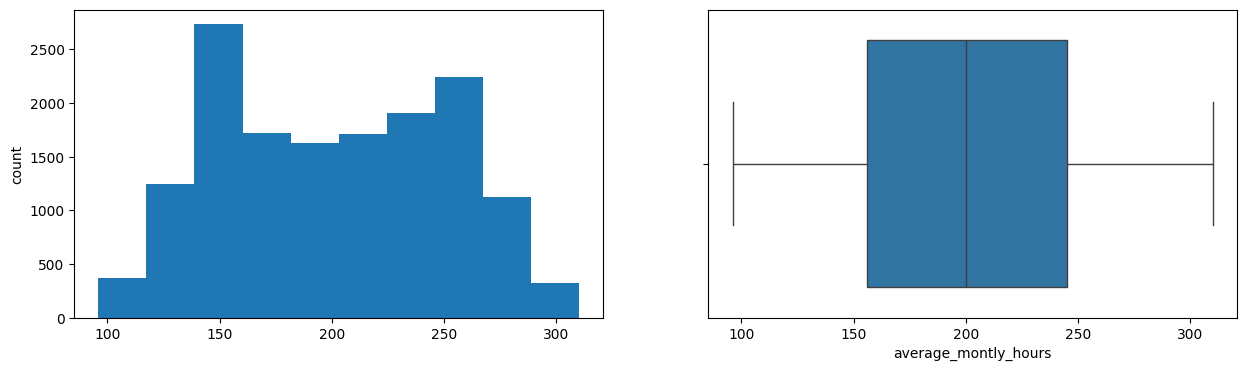

time_spend_company
Skew : 1.85


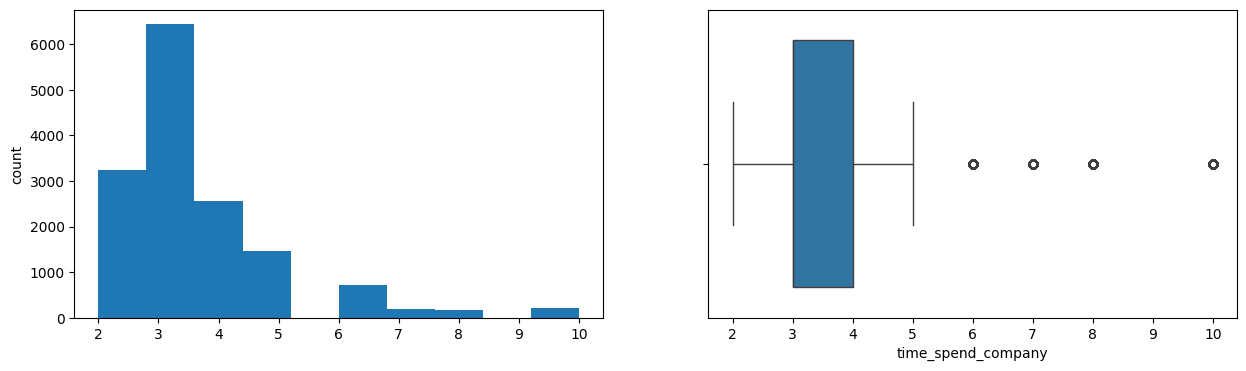

Work_accident
Skew : 2.02


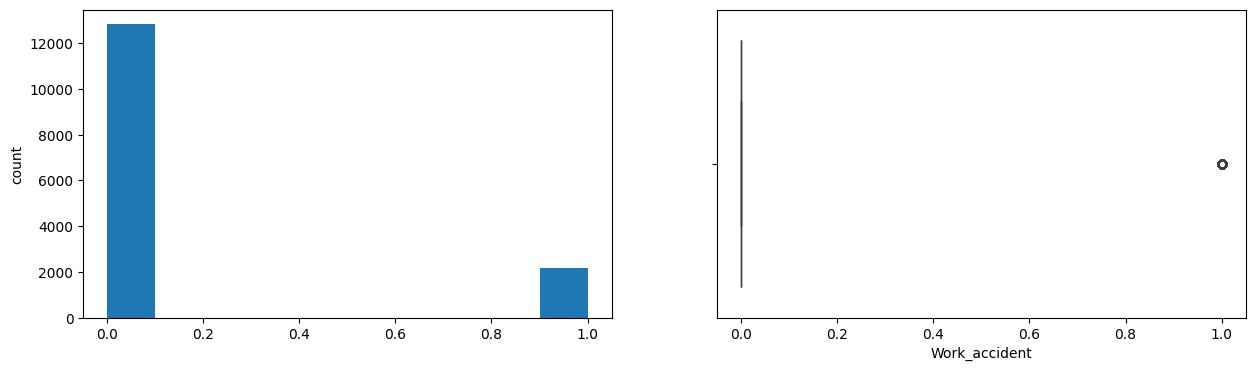

promotion_last_5years
Skew : 6.64


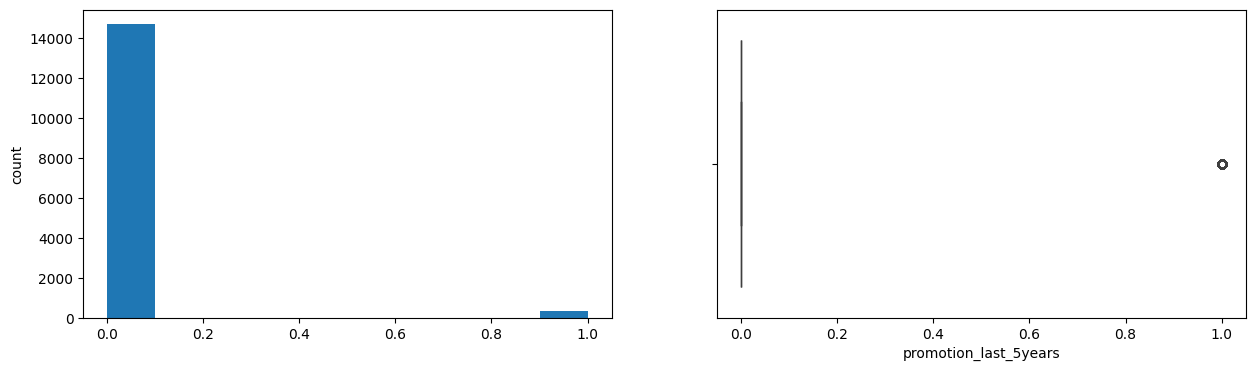

In [28]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

many employee have satisfaction level in near zero ?

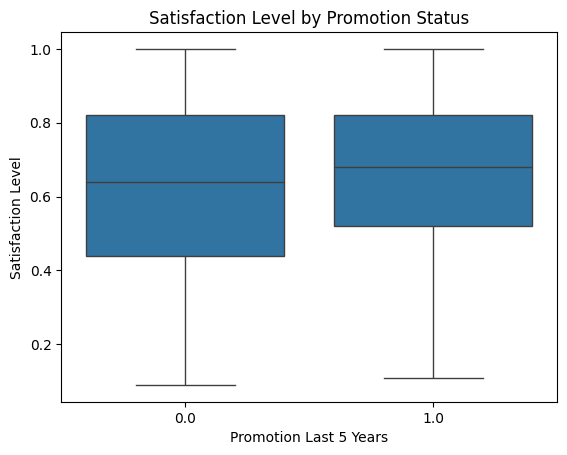

In [29]:
sns.boxplot(data=data, x='promotion_last_5years', y='satisfaction_level')
plt.xlabel('Promotion Last 5 Years')
plt.ylabel('Satisfaction Level')
plt.title('Satisfaction Level by Promotion Status')
plt.show()



<Axes: xlabel='satisfaction_level', ylabel='number_project'>

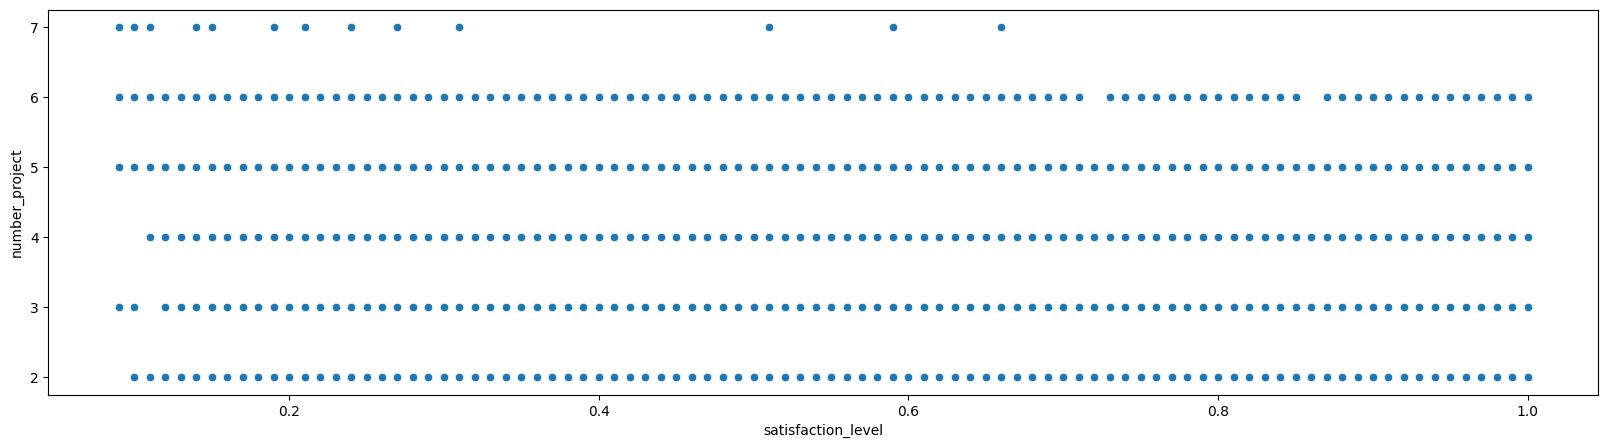

In [30]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x ='satisfaction_level', y = 'number_project', data=data)

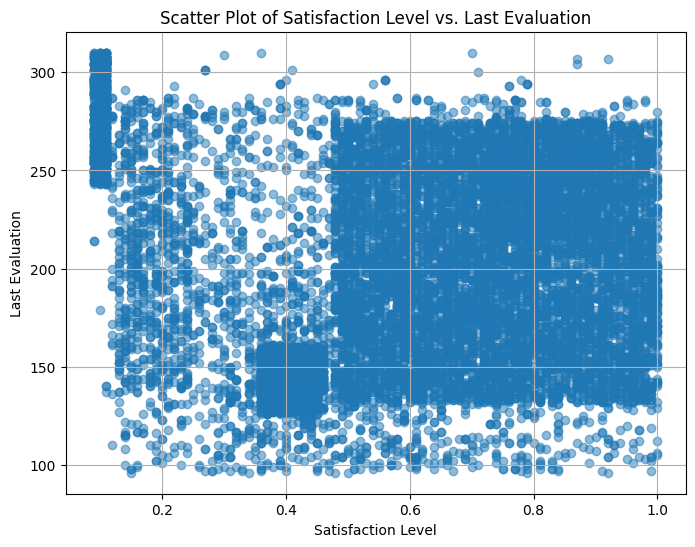

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(data['satisfaction_level'], data['average_montly_hours'], alpha=0.5)
plt.title('Scatter Plot of Satisfaction Level vs. Last Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.grid(True)
plt.show()

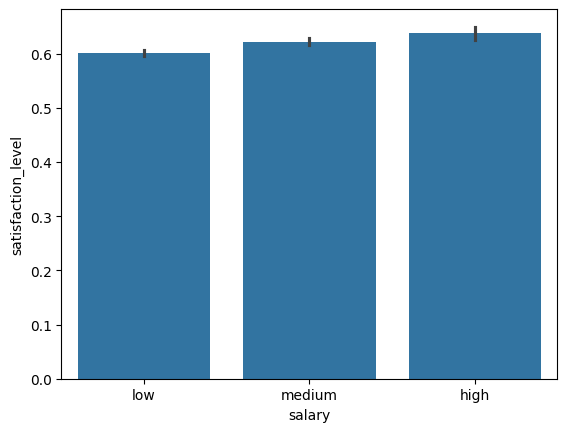

In [32]:
# the satisfaction level increases with increase of salary
sns.barplot(data=data, x='salary', y='satisfaction_level')
plt.show()

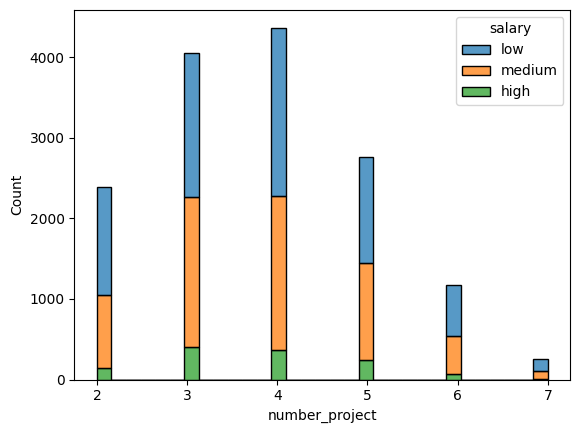

In [33]:
sns.histplot(data=data, x='number_project', hue='salary', multiple='stack')
plt.show()


In [34]:
data.value_counts('number_project')

number_project
4.0    4365
3.0    4055
5.0    2761
2.0    2388
6.0    1174
7.0     256
Name: count, dtype: int64

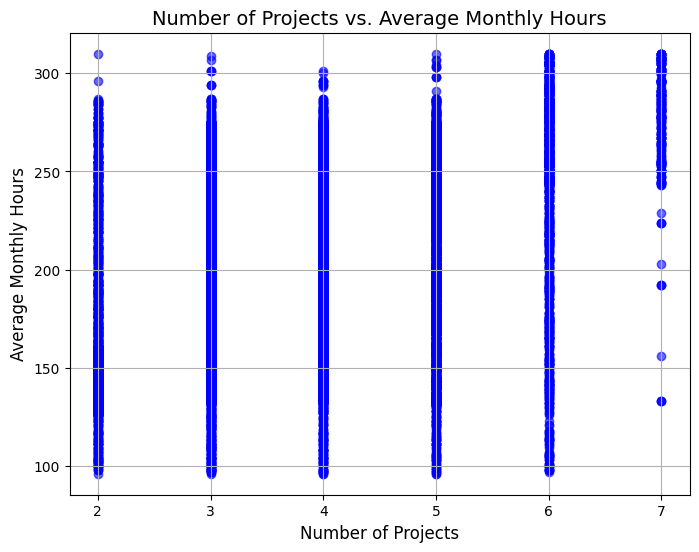

In [35]:
# Plotting number of projects vs. average monthly hours
plt.figure(figsize=(8, 6))
plt.scatter(data['number_project'], data['average_montly_hours'], color='blue', alpha=0.6)
plt.title('Number of Projects vs. Average Monthly Hours', fontsize=14)
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Average Monthly Hours', fontsize=12)
plt.grid(True)
plt.show()

In [36]:
data.groupby('salary')['satisfaction_level'].mean()

salary
high      0.637470
low       0.600753
medium    0.621817
Name: satisfaction_level, dtype: float64

In [37]:
data.groupby('salary')['satisfaction_level'].mean()

salary
high      0.637470
low       0.600753
medium    0.621817
Name: satisfaction_level, dtype: float64

<Axes: xlabel='satisfaction_level', ylabel='Count'>

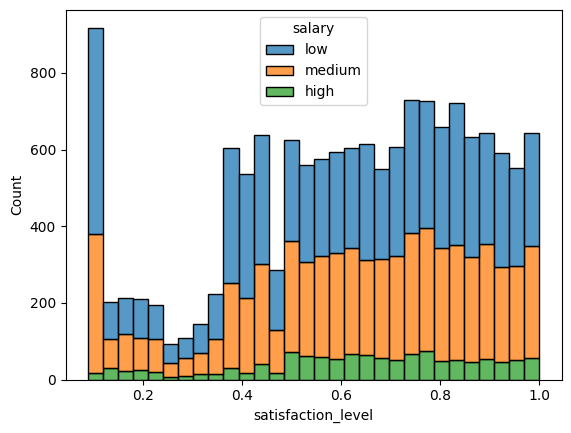

In [38]:
sns.histplot(data=data, x = 'satisfaction_level', hue='salary',  multiple='stack')

C:\Users\farha\AppData\Local\Temp\ipykernel_23840\3583703288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='salary', y='satisfaction_level', data=data, palette='viridis')


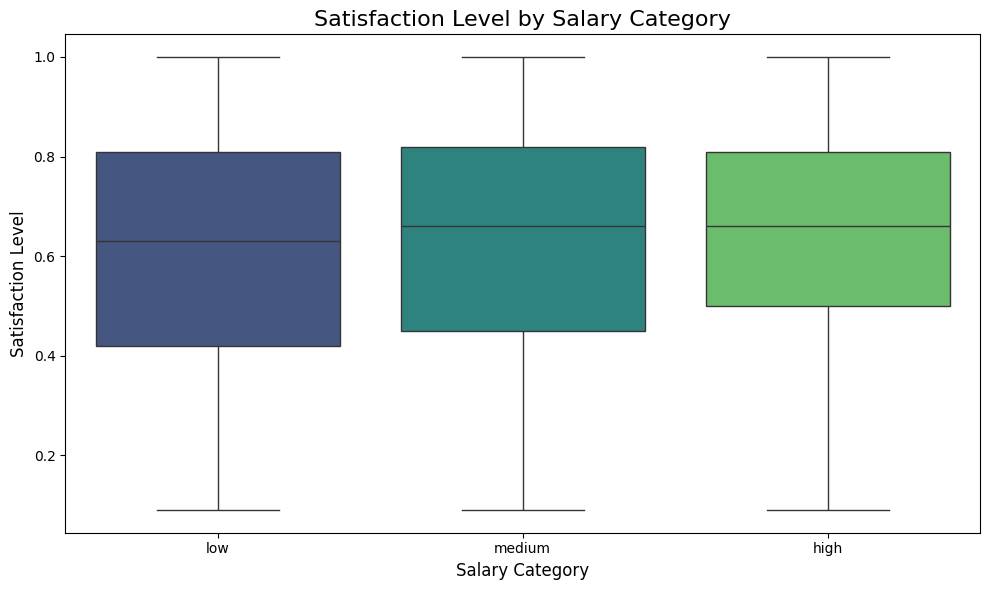

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary', y='satisfaction_level', data=data, palette='viridis')

# Customize the plot
plt.title('Satisfaction Level by Salary Category', fontsize=16)
plt.xlabel('Salary Category', fontsize=12)
plt.ylabel('Satisfaction Level', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.3+ MB


<Axes: xlabel='last_evaluation', ylabel='Count'>

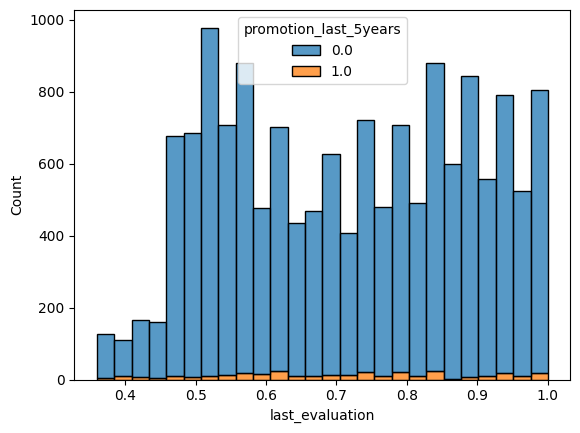

In [41]:
sns.histplot(data=data, x = 'last_evaluation', hue='promotion_last_5years', multiple='stack')

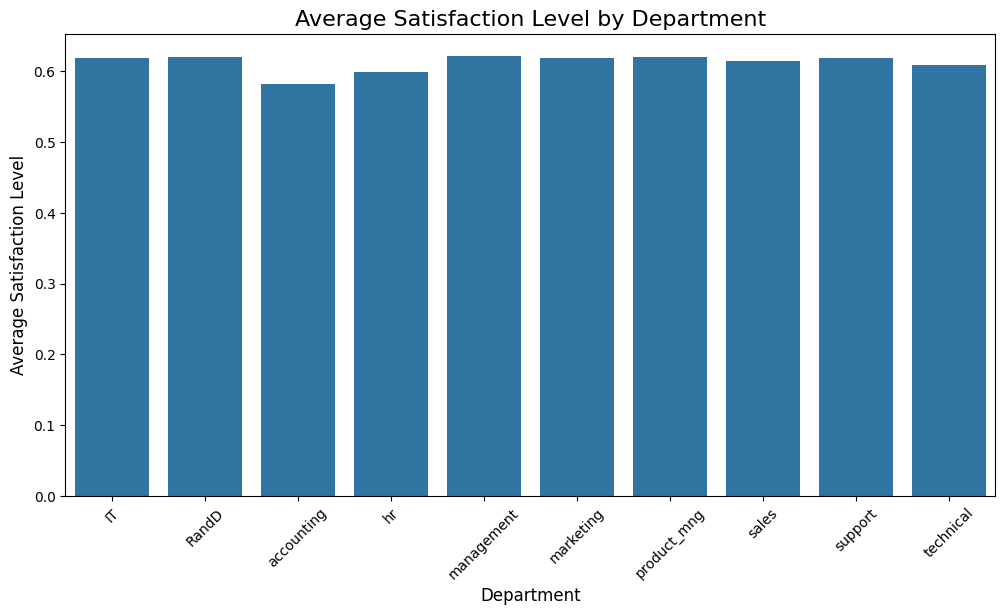

In [42]:
# Group by department and calculate the mean satisfaction level
mean_satisfaction = data.groupby('dept')['satisfaction_level'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='dept', y='satisfaction_level', data=mean_satisfaction)

# Adding labels and title
plt.title('Average Satisfaction Level by Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Satisfaction Level', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()


# Conclusion

- There are several outliers feature 
    - time spend company
    - Work accident
    - Promotion last 5 year